# Urn Model

```
Author:
Zach Wolpe
zachcolinwolpe@gmail.com
www.zachwolpe.com
```

The urn model allows us to calculate the probability of an event. We can calculate the probability of an event haddening by chance, and make inference accordingly.


## Example
To illustrate the urn model, lets work through an example.

Suppose a medical study is conducted to measure the effects of a new drug on blood pressure. Participants were split into two groups: one of which received the drug, the other received an identical in appearance plecebo.

The participants blood preasure was recorded at the beginning of the experiment, as well as at the end of the experiment.

Now we can compare the decrease in blood preasure of the two groups to assess the effects of the drug.


## Results
The decrease in blood pressure of the two groups was recorded:

In [2]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-darkgrid')

In [5]:
treatment = np.array([7, -4, 18, 17, -3, -5, 1, 10, 11, -2])
placebo = np.array([-1, 12, -1, -3, 3, -5, 5, 2, -11, -1, -3])

# EDA (Exploratory Data Analysis)

What does visualising the results tell us?


Compare the mean decrease in each group: 

treatment:  5.0
placebo:  -0.2727



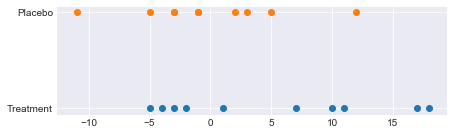

In [22]:
print('')
print('Compare the mean decrease in each group: ')
print('')
print('treatment: ', treatment.mean())
print('placebo: ', round(placebo.mean(), 4))
print('')

plt.figure(figsize=(7,2))
plt.scatter(treatment, y=np.zeros(len(treatment)))
plt.scatter(placebo, y=np.ones(len(placebo)))
plt.yticks(ticks=[0,1], labels=['Treatment', 'Placebo'])
plt.show()

The distributions have roughly the same spread, the mean for the treatment group is 5 (the average decrease in blood pressure is 5 degrees for the treatment group) and the mean for the placebo group is 0. 

## Urn Model

The mean difference seams to imply the treatment worked, however how can we be certain? Could this have happened at random? 

The urn model calculates the probabilty of the outcome we observe - to test how likely it is that this could have happened by chance, thus indirectly testing if the treatment worked.

The following steps are implemented:
    - make a list of all results (place all outcomes in the urn)
    - draw 10 samples at random from the urn
    - record the average decrease in blood pressure (our test statistic)
    - repeat many times, graph the results
    - compute the probability of achieving the result we observed (blood pressure decrease > 5) by chance
    - infer the effectiveness of the treatment

In [53]:
# create the urn
urn = np.concatenate([treatment, placebo])

# sample and calculate mean
samples = []
for i in range(10000):
    samples.append(np.random.choice(urn, size=10, replace=False).mean())

## Inference

Great! we've got our simulated data, now lets inspect

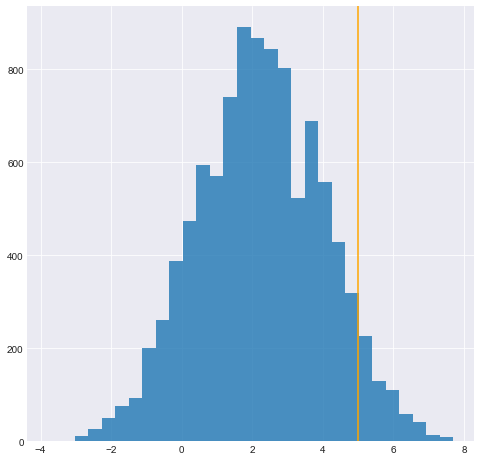

In [77]:
plt.figure(figsize=(8,8))
plt.hist(samples, bins=30, alpha=0.8)
plt.axvline(np.mean(treatment), color='orange')
plt.show()

It seams the true results is an outlier in our density approximation. Now lets test our research question:

In [68]:
prob = np.mean(samples>=treatment.mean())

print('')
print('The probability of a randomly assigned group having an average decrease of blood pressure of 5: ')
print('')
print(prob)


The probability of a randomly assigned group having an average decrease of blood pressure of 5: 

0.0655


## Conclusion

It is highly unlikely the a random result produces an average decrease in blood pressure as substantial as 5 degrees, as such we can conclude the treatment was effective.

 
## Statistics
The average of the urn = Expected value of 1 draw.

Standard deviation of urn = Standard deviation for one draw.

An empirical confidence interval can be approximated using the results.

Other test-statistics can be assessed: total count, proportion, etc.

The urn model is a simple chance process.